<H1>Sumanta Kumar Paul    /   Machine Learning Regression Capstone Project.

<h3>Part 1: Data Exploration & EDA

<h4>1.1) Load the dataset and inspect: Data types, shape, missing values, statistical summary.

In [162]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


In [163]:
#Load the dataset and inspect: Data types, shape, missing values, statistical summary.
#df = pd.read_csv("/content/sales_data.csv")
df = pd.read_csv('https://raw.githubusercontent.com/suyashi29/python-su/master/ML%20Regression%20Analysis/sales_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Advertising       15289 non-null  int64  
 1   Discount          15289 non-null  float64
 2   Store_Size        15289 non-null  int64  
 3   Competitor_Price  15289 non-null  int64  
 4   Seasonality       15289 non-null  int64  
 5   Online_Presence   15289 non-null  int64  
 6   Economic_Index    15289 non-null  float64
 7   Sales_Price       15289 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 955.7 KB


In [164]:
df.describe()

Advertising      Discount    Store_Size  Competitor_Price  \
count  15289.000000  15289.000000  15289.000000      15289.000000   
mean    3003.125123     12.477884   1250.217607        350.055726   
std     1155.386934      4.318831    432.943261         86.645301   
min     1000.000000      5.000139    500.000000        200.000000   
25%     1994.000000      8.773985    873.000000        276.000000   
50%     2993.000000     12.445984   1251.000000        349.000000   
75%     4009.000000     16.187154   1622.000000        426.000000   
max     4999.000000     19.998390   1999.000000        499.000000   

        Seasonality  Online_Presence  Economic_Index   Sales_Price  
count  15289.000000     15289.000000    15289.000000  15289.000000  
mean       0.503041         0.505200       75.036488   9742.238659  
std        0.500007         0.499989       14.384577  10431.687753  
min        0.000000         0.000000       50.006501 -33869.426249  
25%        0.000000         0.000000       62.586683   2698.709238  
50%        1.000000         1.000000       75.142103   9765.060018  
75%        1.000000         1.000000       87.592192  16742.723736  
max        1.000000         1.000000       99.993755  54347.892806

In [130]:
df.shape

(15289, 8)

In [131]:
df.isnull().sum()
#We can infer that there are no missing values in the columns.

Advertising         0
Discount            0
Store_Size          0
Competitor_Price    0
Seasonality         0
Online_Presence     0
Economic_Index      0
Sales_Price         0
dtype: int64

<h4>1.2) Perform EDA: Histograms, Boxplots, Pairplots, Correlation heatmap.

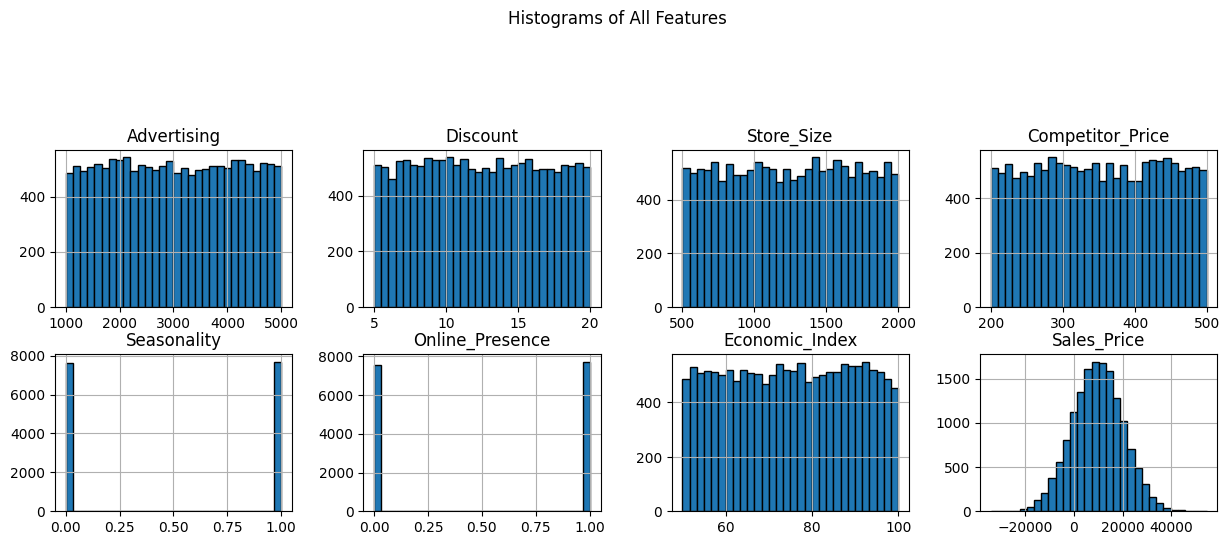

In [156]:
#Histplot of all the features
df.hist(bins=30, figsize=(15, 10), layout=(4, 4) ,edgecolor='black')
plt.suptitle('Histograms of All Features', y=1.02)
#plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

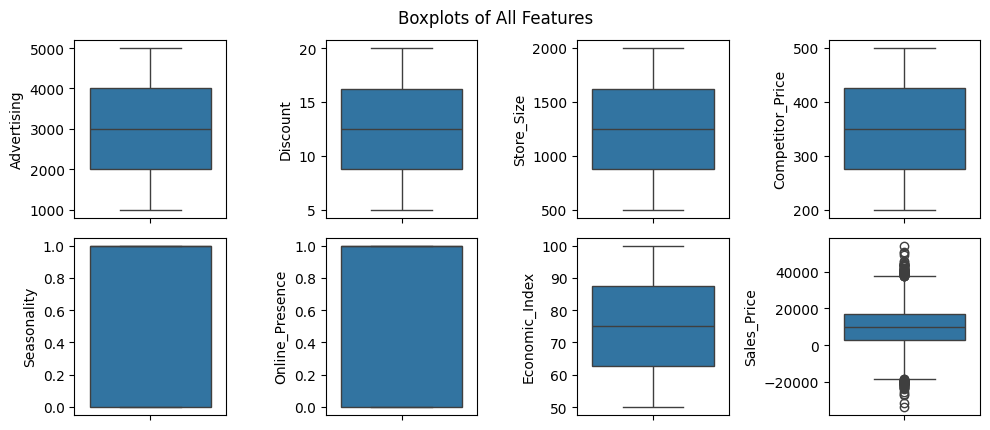

In [133]:
# Boxplots for numerical features to identify outliers
plt.figure(figsize=(10, 8))
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[column])

plt.tight_layout()
plt.suptitle('Boxplots of All Features',y=1.02)
plt.show()

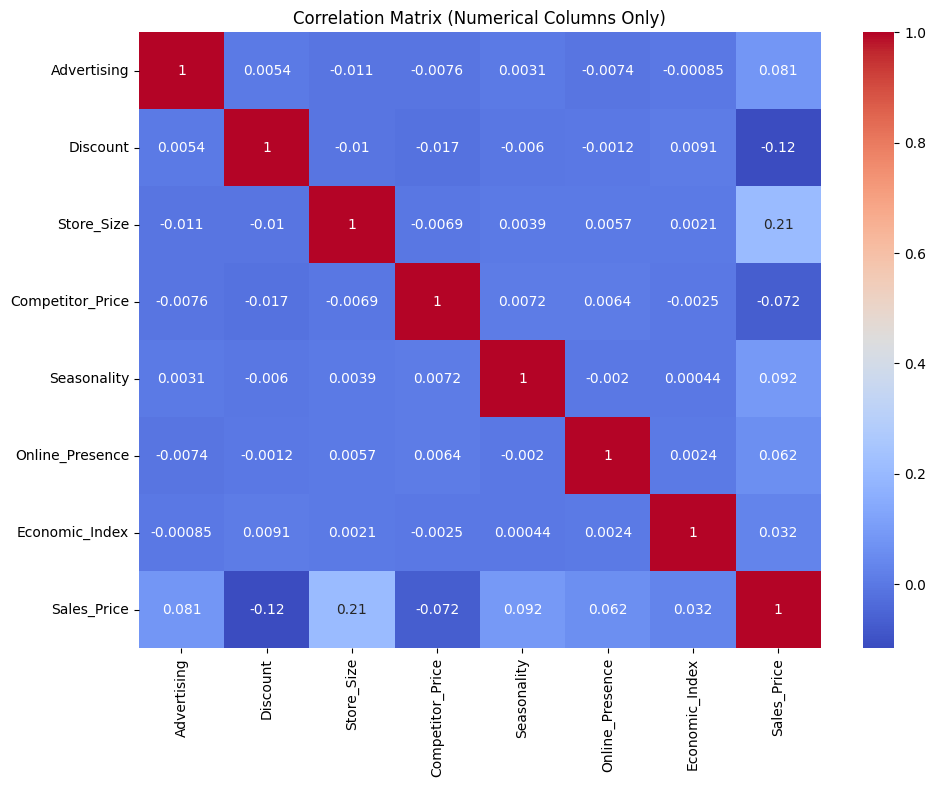

In [134]:
#Correlation matrix for numerical columns
plt.figure(figsize=(11, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Columns Only)")
plt.show()

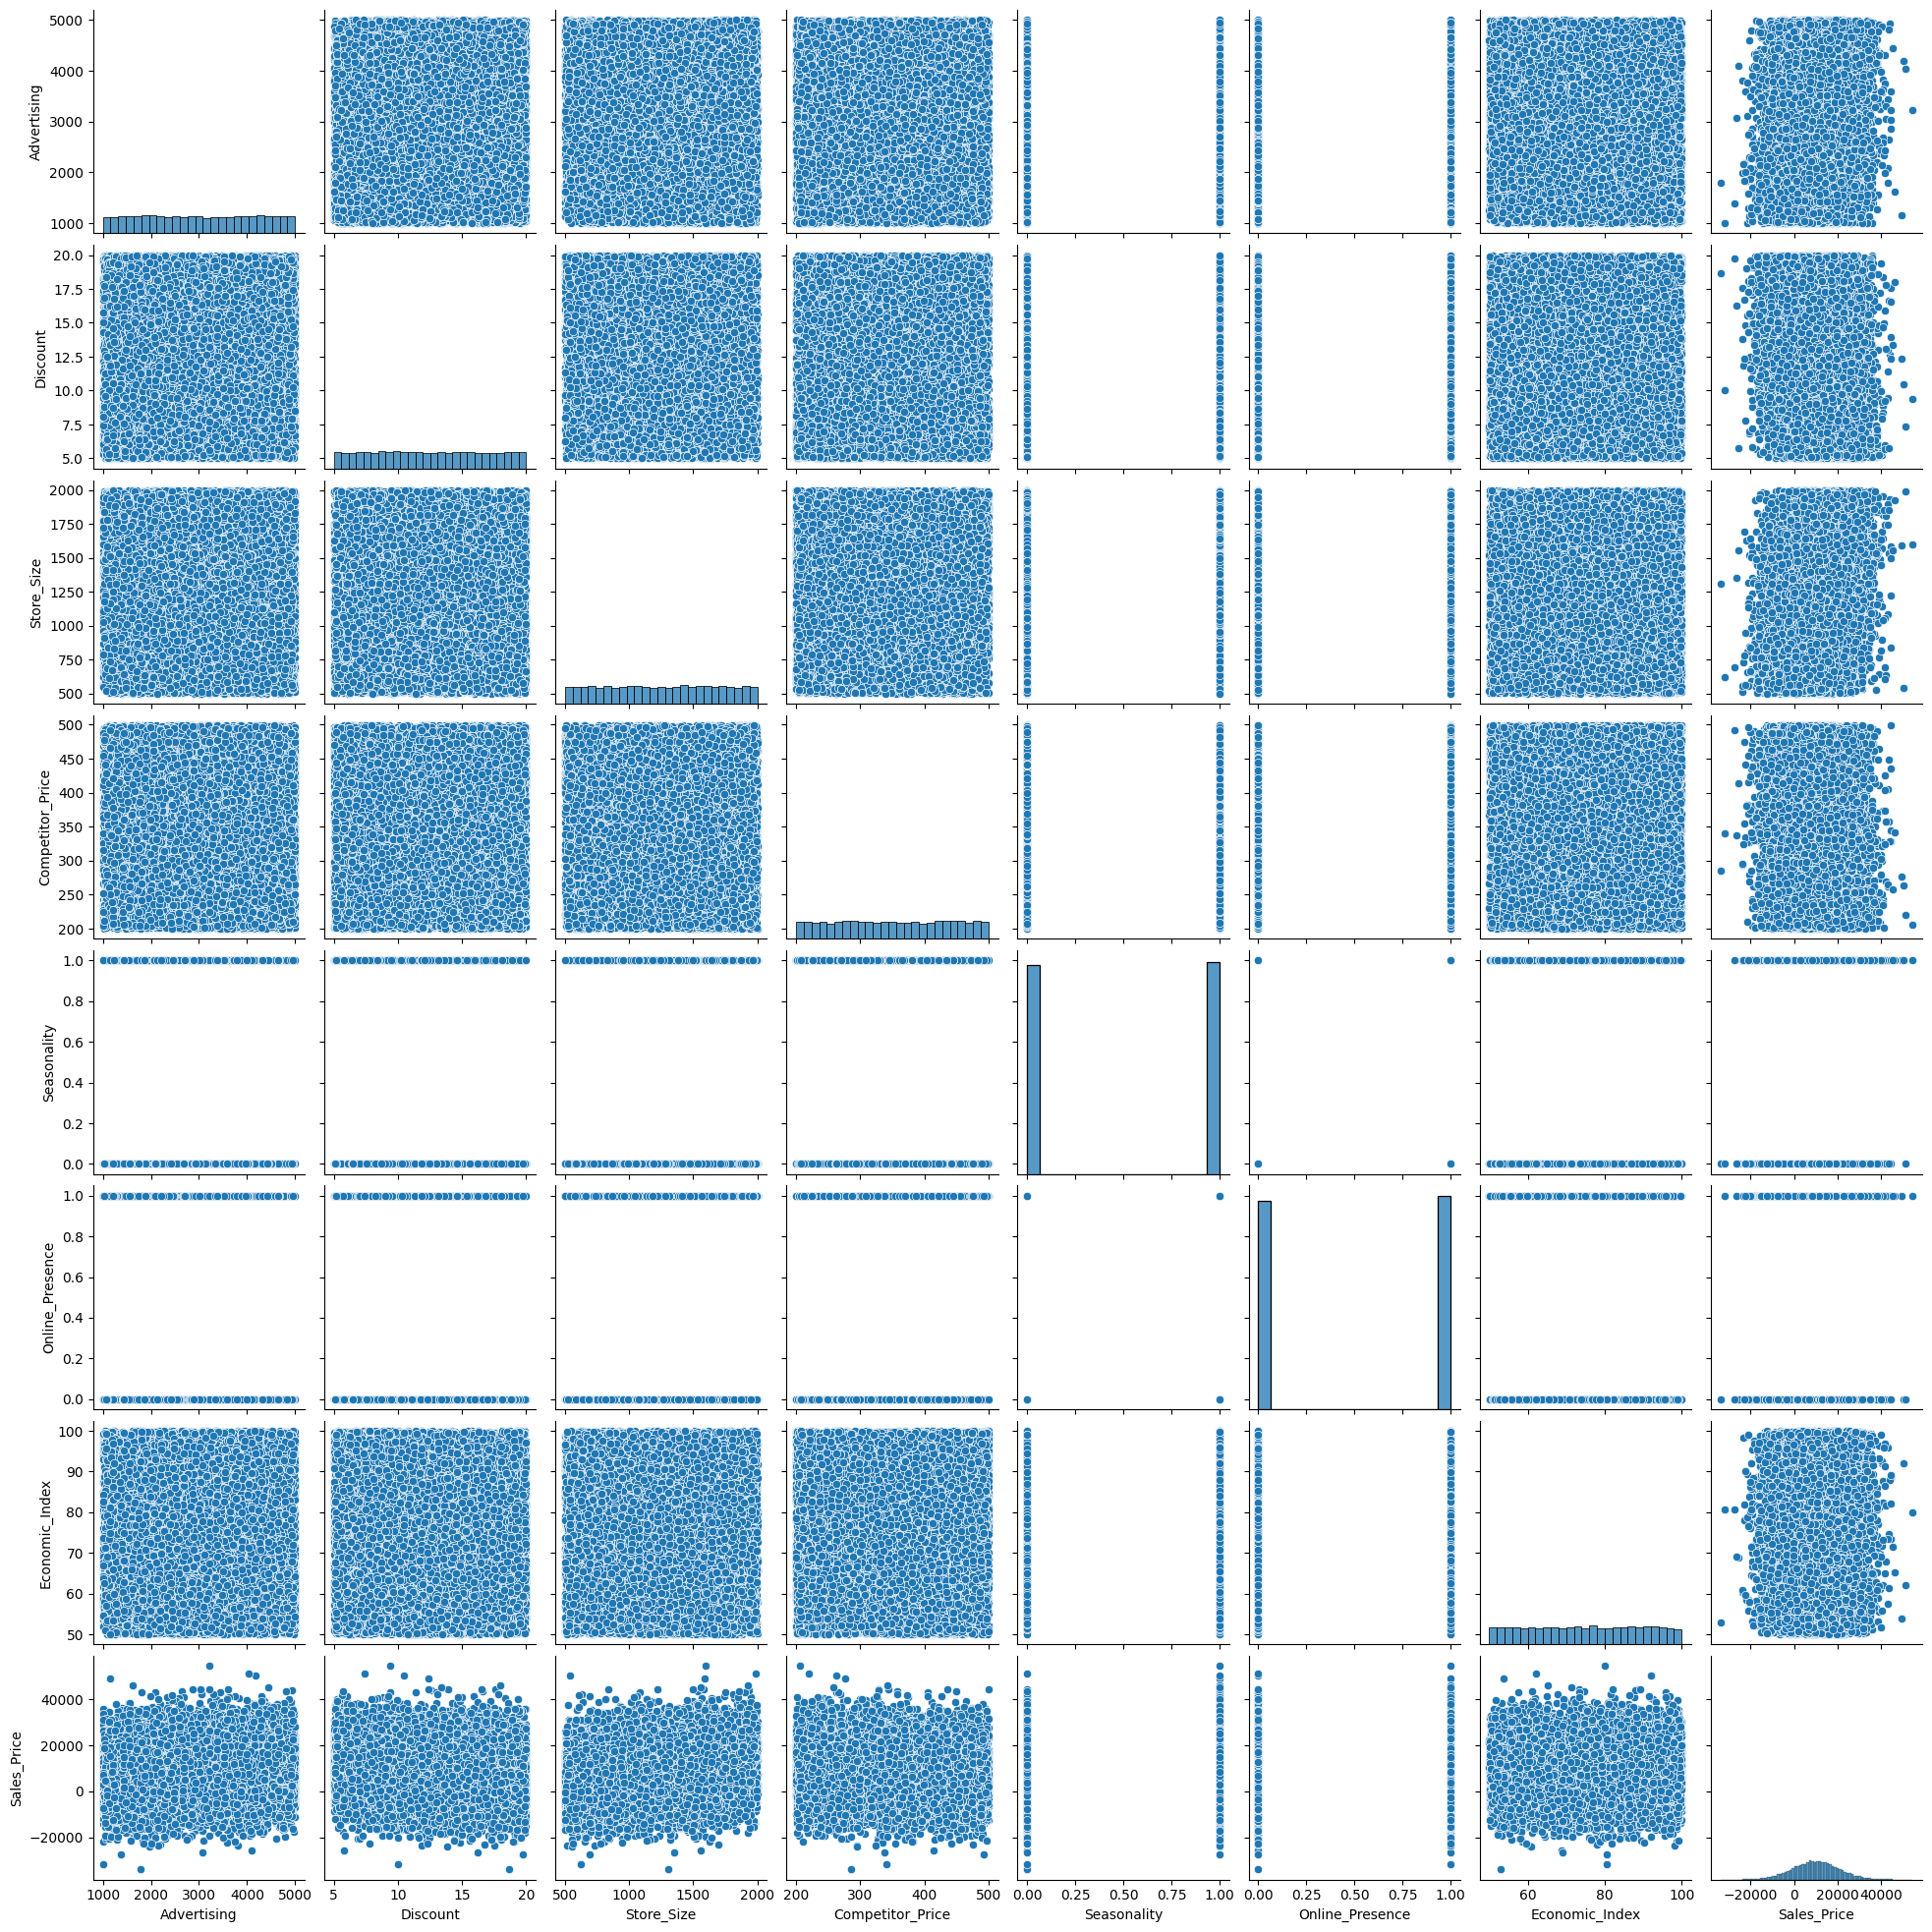

<Figure size 1100x800 with 0 Axes>

<Figure size 1100x800 with 0 Axes>

In [135]:
#Pair Plot of all the Features.
sns.pairplot(df)
plt.show()
plt.figure(figsize=(11, 8))

<H4>1.3) Identify whether the dataset is suitable for linear or non-linear regression using scatter plots.

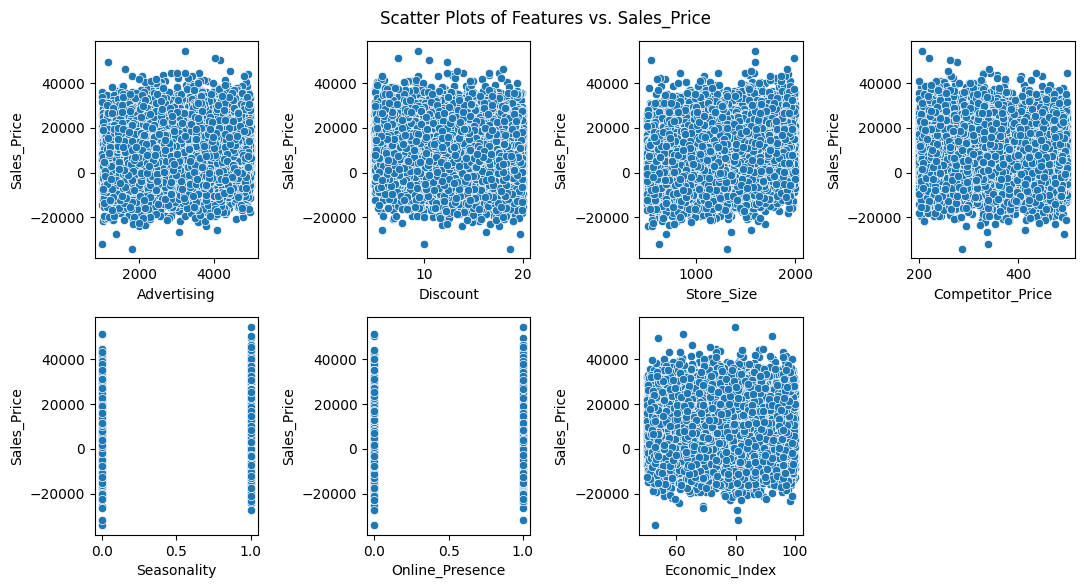

In [136]:
# Scatter plots of features vs. Sales_Price to check for linearity
plt.figure(figsize=(11, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(x=df[col], y=df['Sales_Price'])
    plt.xlabel(col)
    plt.ylabel('Sales_Price')
plt.tight_layout()
plt.suptitle('Scatter Plots of Features vs. Sales_Price',y=1.02)
plt.show()

<H3>Part 2: Data Preprocessing

<h4>2.1) Split the dataset into features (X) and target (y).

In [137]:
X = df[['Advertising', 'Discount', 'Store_Size', 'Competitor_Price', 'Seasonality', 'Online_Presence', 'Economic_Index']]
y = df['Sales_Price']

<h4>2.2) Apply Standard Scaling.

In [138]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<h4> 2.3) Perform Train-Test Split (80-20).

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


<h3> Part 3: Model Building

<h4>3.1) Implement Multiple Linear Regression model and name it as sales_predict.

In [140]:
#Linear Regression model named sales_predict
sales_predict = LinearRegression()
#Trained the model
sales_predict.fit(X_train, y_train)

# Made predictions on the test set
y_pred = sales_predict.predict(X_test)

<h4>3.2) Evaluate using R², RMSE, and Adjusted R².

In [141]:
#R square
r2 = r2_score(y_test, y_pred)
print(f"\nR² Score (Linear Regression): {r2:.4f}")
#RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE (Linear Regression): {rmse_linear:.4f}")



R² Score (Linear Regression): 0.0818
RMSE (Linear Regression): 9964.3169


<h4>3.3) Perform K-Fold Cross Validation (k=5 or 10).

R² Scores per fold: [0.08180196 0.07539804 0.07915771 0.07984664 0.08129069]
Average R² Score: 0.0795


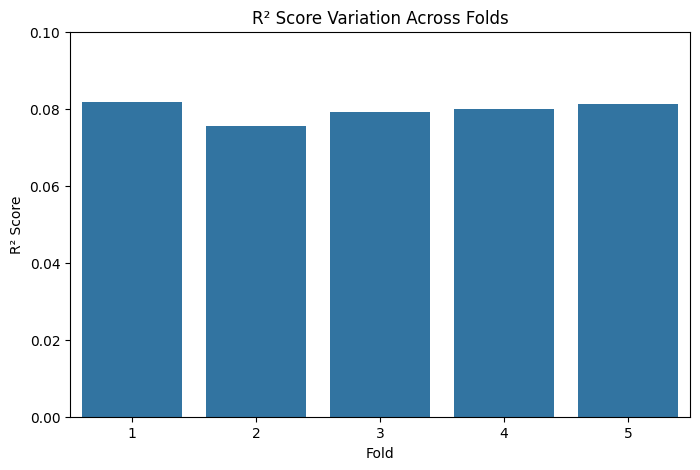

In [142]:
#K-Fold Cross Validation=5
kf= KFold(n_splits=5, shuffle=True, random_state=42)
#Cross-validation for R² score
scores= cross_val_score(sales_predict, X_scaled, y, cv=kf, scoring='r2')

print(f"R² Scores per fold: {scores}")
print(f"Average R² Score: {np.mean(scores):.4f}")

# Visualizing R2 score variation across folds
plt.figure(figsize=(8, 5))
sns.barplot(x=list(range(1, len(scores)+1)), y=scores)
plt.title("R² Score Variation Across Folds")
plt.xlabel("Fold")
plt.ylabel("R² Score")
plt.ylim(0, 0.1)
plt.show()

<h3>Part 4: Regularization

<h4>4.1) Implement Ridge Regression (L2 Regularization) and use GridSearchCV for tuning alpha parameter.

In [143]:
#Ridge Regression model
ridge_model = Ridge(random_state=42)
# Define the parameter grid
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Grid Search for Ridge
grid_search_ridge = GridSearchCV(ridge_model, ridge_param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='r2', n_jobs=-1)
grid_search_ridge.fit(X_train, y_train)

# Best Ridge model
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)

# Evaluate Ridge
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"Best Alpha for Ridge: {grid_search_ridge.best_params_['alpha']}")
print(f"R² Score (Ridge): {r2_ridge:.4f}")
print(f"RMSE (Ridge): {rmse_ridge:.4f}")

Best Alpha for Ridge: 100
R² Score (Ridge): 0.0818
RMSE (Ridge): 9964.3999


<h4>4.2) Implement Lasso Regression (L2 Regularization) and use GridSearchCV for tuning alpha parameter.

In [144]:
#Lasso Regression model
lasso_model = Lasso(random_state=42)
# Define the parameter grid
lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Grid Search for Lasso
grid_search_lasso = GridSearchCV(lasso_model, lasso_param_grid, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='r2', n_jobs=-1)
grid_search_lasso.fit(X_train, y_train)

# Best Lasso model
best_lasso_model = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test)


# Evaluate Lasso
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Best Alpha for Lasso: {grid_search_lasso.best_params_['alpha']}")
print(f"R² Score (Lasso): {r2_lasso:.4f}")
print(f"RMSE (Lasso): {rmse_lasso:.4f}")

Best Alpha for Lasso: 0.001
R² Score (Lasso): 0.0818
RMSE (Lasso): 9964.3169


<h4>4.3) Compare R² and RMSE for all models.

In [145]:
print("Model Performance Comparison")

performance_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression'],
    'R² Score': [r2, r2_ridge, r2_lasso],
    'RMSE': [rmse_linear, rmse_ridge, rmse_lasso]
})
print(performance_summary.round(6))


Model Performance Comparison
               Model  R² Score         RMSE
0  Linear Regression  0.081802  9964.316852
1   Ridge Regression  0.081787  9964.399896
2   Lasso Regression  0.081802  9964.316871


<H3> We can infer that Multiple Linear Regression model performs the best but other model are quite close too.

<h3>Part 5: Visualizations

<h4> 5.1) Correlation Matrix Heatmap.

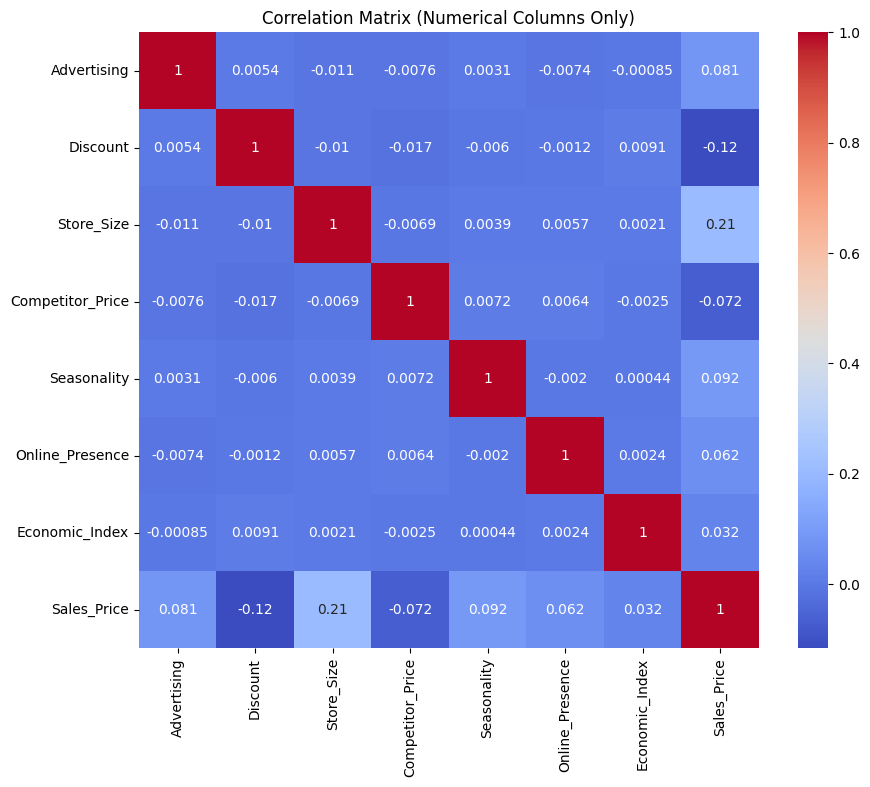

In [146]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Numerical Columns Only)")
plt.show()


<h4> 5.2) Scatter plots for linearity check.

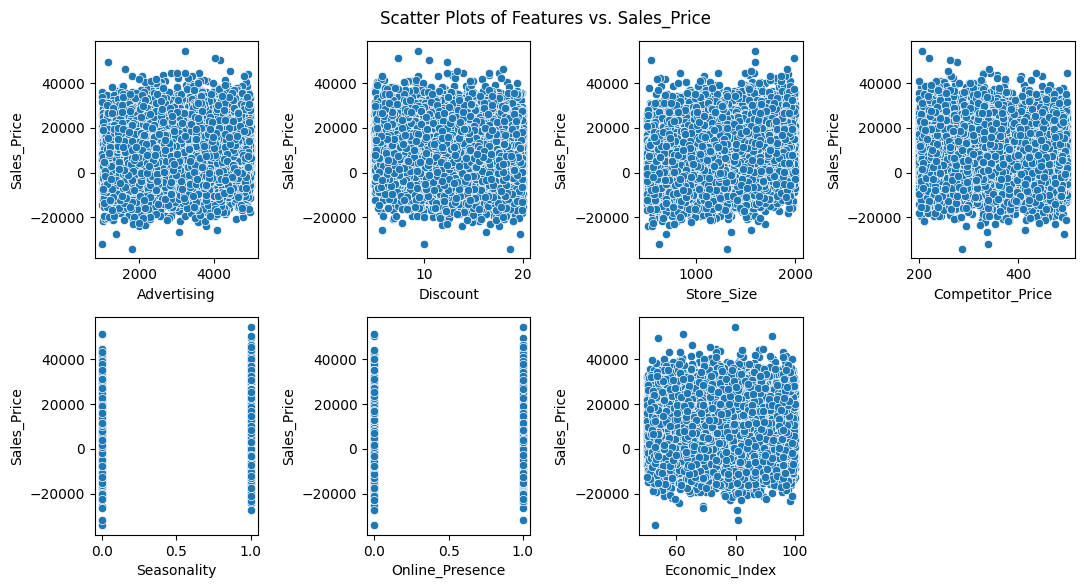

In [147]:
# Scatter plots of features vs. Sales_Price to check for linearity
plt.figure(figsize=(11, 8))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.scatterplot(x=df[col], y=df['Sales_Price'])
    plt.xlabel(col)
    plt.ylabel('Sales_Price')
plt.tight_layout()
plt.suptitle('Scatter Plots of Features vs. Sales_Price',y=1.02)
plt.show()

<h4> 5.3) Actual vs Predicted graph for all three models (Linear, Ridge, Lasso).)

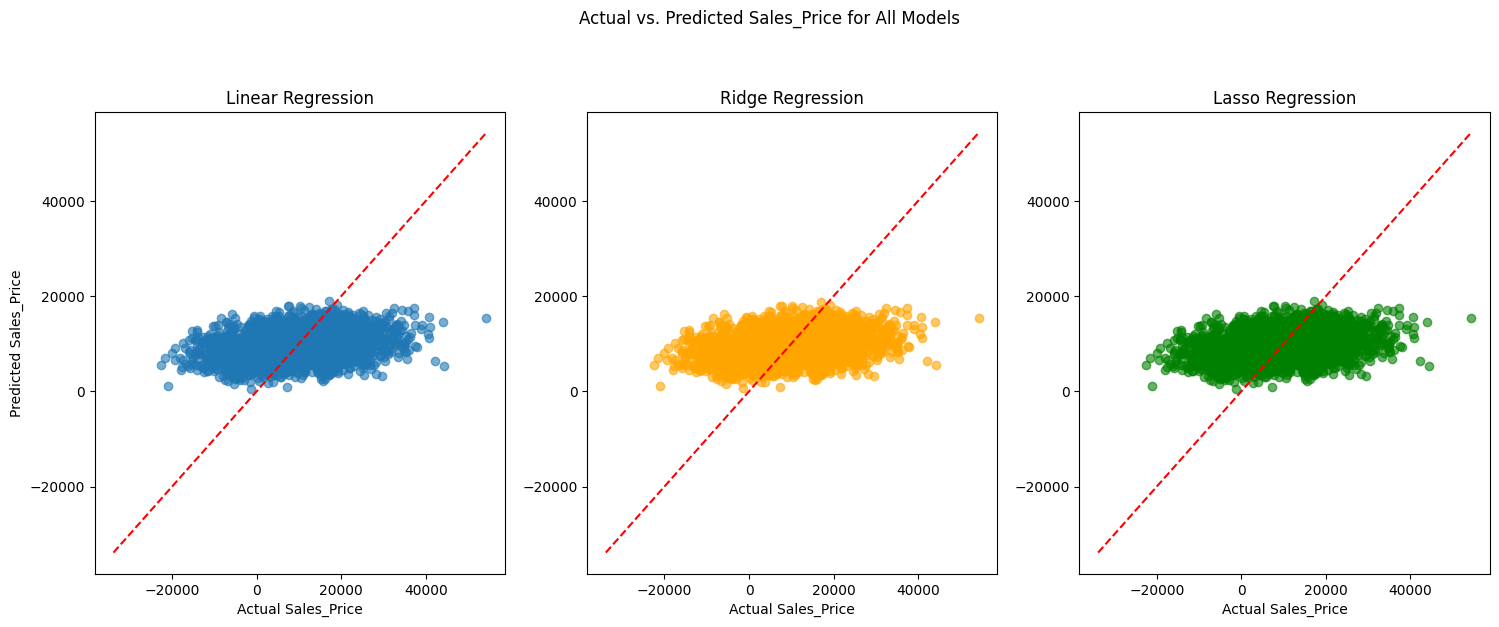

In [148]:
plt.figure(figsize=(18, 6))

# Linear Regression Plot
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()],'r--')
plt.xlabel('Actual Sales_Price')
plt.ylabel('Predicted Sales_Price')
plt.title(f'Linear Regression')

# Ridge Regression Plot
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Sales_Price')
plt.title(f'Ridge Regression')

# Lasso Regression Plot
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_lasso, alpha=0.6, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Sales_Price')
plt.title(f'Lasso Regression')

plt.suptitle('Actual vs. Predicted Sales_Price for All Models', y=1.05)
plt.show()

<h4> 5.4) Residual plots

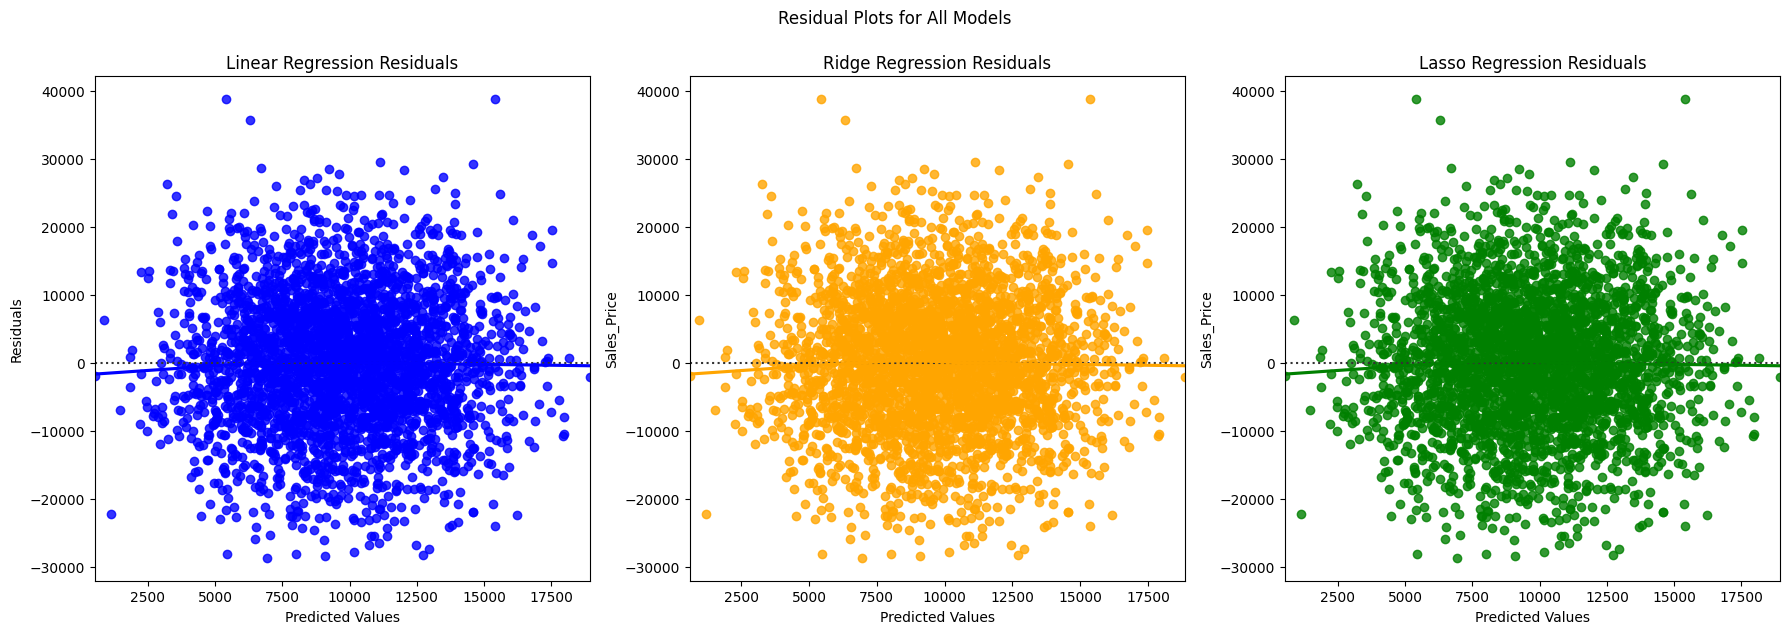

In [149]:
plt.figure(figsize=(18, 6))

# Linear Regression Residual Plot
plt.subplot(1, 3, 1)
sns.residplot(x=y_pred, y=y_test - y_pred, color='blue', lowess=True)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')

# Ridge Regression Residual Plot
plt.subplot(1, 3, 2)
sns.residplot(x=y_pred_ridge, y=y_test - y_pred_ridge, color='orange', lowess=True)
plt.xlabel('Predicted Values')
plt.title('Ridge Regression Residuals')

# Lasso Regression Residual Plot
plt.subplot(1, 3, 3)
sns.residplot(x=y_pred_lasso, y=y_test - y_pred_lasso, color='green', lowess=True)
plt.xlabel('Predicted Values')
plt.title('Lasso Regression Residuals')

plt.tight_layout()
plt.suptitle('Residual Plots for All Models', y=1.05)
plt.show()

<h3>Part 6: Prediction on New Data

<h4>6.1) Create a sample input and predict Sales_Price using the best-performing model.

In [150]:
#Final/best model is multiple linear regression one.
final_model = sales_predict

# Creates a sample input DataFrame
new_data = pd.DataFrame({
    'Advertising': [4000],
    'Discount': [15.0],
    'Store_Size': [1500],
    'Competitor_Price': [450],
    'Seasonality': [1],
    'Online_Presence': [1],
    'Economic_Index': [90.0]
})

new_data_scaled = scaler.transform(new_data)
# Predict Sales_Price using the best model(linear)

predicted_sales_price = final_model.predict(new_data_scaled)

print(f"\nPredicted Sales Price for the new data: ${predicted_sales_price[0]:.2f}")


Predicted Sales Price for the new data: $12012.19


<H1>Short Write-up of key findings and best model details.

***1. Data Exploration and EDA Findings***

      There were no missing values in the dataset.

      Most of the sales values are between 0 and 20,000.

      Some values are outliers, especially those greater than 40,000 and less than -20,000.

      Store_Size showed the strongest positive correlation with Sales_Price.

      Scatter plots between features and target showed a lot of spread and no clear linear relationship.

      Based on scatter plots, the data does not strongly support a linear model.

***2. Model Building and Evaluation***

      Linear Regression gave an R² score of around 0.0818 and RMSE of around 9964.

      K-Fold Cross Validation showed R² scores between 0.075 and 0.082 with an average of 0.0795.

      Ridge Regression gave similar results with a best alpha value of 100.

      Lasso Regression also gave similar results with a best alpha value of 0.001.

      All three models had almost the same performance.

      The R² score for all models was very low, indicating they explain only 8 percent of the variance in Sales_Price.

      The RMSE values were high, meaning the prediction errors are large.

***3. Model Comparison and Interpretation***


      Regularization (Ridge and Lasso) did not improve the model significantly.

      This suggests that the input features are not strong predictors of the target variable.

      The residual plots formed a circular scattered pattern, which indicates a poor fit.

      Actual vs Predicted graphs showed large differences, especially at extreme values.

***4. Best Model Selection***

      Since all three models performed equally, Linear Regression is selected as the best model as it was marginally better.

      It is the simplest and gave the same accuracy as Ridge and Lasso.

***5. Conclusion***

      The current features are not sufficient to accurately predict Sales_Price.

      Model performance is poor due to low explanatory power of the variables.

      To improve predictions, we need to add new features or transform existing ones.

      Possible improvements include feature engineering, adding external variables, or trying non-linear models.